---
title: Lab 2- Avocado Prices for GSB 544
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

In [196]:

import pandas as pd
import numpy as np

# Uploading the data
file_path = 'avocado-updated-2020.csv'

avocadodata = pd.read_csv(file_path)


In [197]:
#Checking to see if the data actually uploaded 

avocadodata.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


1. Briefly describe the data set. What information does it contain:

This data set contains historical data on avocado, specifically the prices and sales volume in multiple cities, states, and regions of the USA between January 4, 2015 to May 17, 2020. The columns for this data set include the following: data, average_price (of a single avocado), total_volume (total number of avocados sold), 4046 (total number of avocados with PLU 4046 sold), 4225 (total number of avocados with PLU 4225 sold), 4770 (total number of avocados with PLU 4770 sold), total_bags, small_bags, large_bags, xlarge_bags, type, year, and geography. 

In [198]:
# Renaming the columns to make more sense

avocadodata.rename(columns={
    '4046': 'small_avocado',
    '4225': 'large_avocado', 
    '4770': 'extrasmall_avocado',
    'total_volume': 'total_sold'
}, inplace=True)


In [199]:
# Trying to see how I should organize the 'geography' section
avocadodata['geography'].unique()


array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico'], dtype=object)

In [200]:
# Adding geo_type variable to define "metro", "state", "region", and "US"
geo_type_map = {
    'Total U.S.': 'US',
    'West': 'region',
    'Northeast': 'region',
    'Southeast': 'region',
    'South Central': 'region',
    'Plains': 'region',
    'Midsouth': 'region',
    'Great Lakes': 'region',
    'Northern New England': 'region',
    'California': 'state',
    'South Carolina': 'state',
    'West Tex/New Mexico': 'state'
}


In [201]:
# Making "metro" apply to all locations not specified above
avocadodata['geo_type'] = avocadodata['geography'].map(geo_type_map).fillna('metro')


In [202]:
# Creating new dataframe for question 3: Which major geographical region sold the most total organic, small Hass avocados in 2017?

# Converting date column to datetime
avocadodata['date'] = pd.to_datetime(avocadodata['date'])

# Filter rows where year is 2017
q3data = avocadodata[avocadodata['date'].dt.year == 2017]


In [203]:
# Filtering for including only organic and small hass avocados in q3 dataset

q3data = q3data[
    (q3data['type'] == 'organic') &       
    (q3data['geo_type'] == 'region')      
]

In [204]:
# Grouping by region and counting avocado sales
region_sales = q3data.groupby('geography')['small_avocado'].sum()
region_sales


geography
Great Lakes              202487.68
Midsouth                 186395.50
Northeast                925832.36
Northern New England       1249.48
Plains                   168583.40
South Central           1717104.19
Southeast                285124.34
West                    1870206.29
Name: small_avocado, dtype: float64

In [205]:
# Finding region with most sales

top_region = region_sales.idxmax()
top_region


'West'

In [206]:
# Finding out the actual amount of sales 

top_sales = region_sales.max()
top_sales

1870206.29

The major geographical region that sold the most total organic, small Hass avocados in 2017 was "West" with about 1,870,206 avocados sold. 

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?



In [207]:
# Extracting the year, month, and day (year was already given)

avocadodata['year'] = avocadodata['date'].dt.year
avocadodata['month'] = avocadodata['date'].dt.month
avocadodata['day'] = avocadodata['date'].dt.day


In [208]:
# Finding month with the highest average volume of avocado sales: (total_sold) in metro.

metro_data = avocadodata[avocadodata['geo_type'] == 'metro']
monthly_totals = metro_data.groupby('month')['total_sold'].sum()
top_month_num = monthly_totals.idxmax()
top_month_sales = monthly_totals.max()



In [209]:
# Displaying the month
top_month_num

np.int32(5)

In [210]:
# Displaying the number from May
top_month_sales

740224734.89

May is the 5th month, meaning over the years, it had the most average monthly avocado sales. 

In [211]:
# Finding the exact month and year that had the highest average sales for avocados. 

newgrouped = metro_data.groupby(['year', 'month'])['total_sold'].sum().reset_index()
top_row = newgrouped.loc[newgrouped['total_sold'].idxmax()]


In [212]:
# Showing the exact month and year
top_row

year          2.020000e+03
month         5.000000e+00
total_sold    1.768148e+08
Name: 64, dtype: float64

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [214]:
# Finding the top metros

top5_metros = (
    metro_data.groupby('geography')['total_sold']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)


In [215]:
# Listing the top metros

top5_metros

Index(['Los Angeles', 'New York', 'Dallas/Ft. Worth', 'Houston',
       'Phoenix/Tucson'],
      dtype='object', name='geography')

The metro area geographical regions that sold the most total avocados include: Los Angeles, New York, Dallas/Ft. Worth, Houston, and Pheonix/Tuscon.

In [216]:
# Getting the data into this new dataset

top5_data = metro_data[metro_data['geography'].isin(top5_metros)]


In [217]:
# Creating a plot

from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, theme_minimal, stat_summary

metroboxplot = (
    ggplot(top5_data, aes(x='geography', y='total_sold')) +
    geom_boxplot(fill="skyblue") 
    +labs(
        title='Top 5 Metro Geographical Regions and Their Total Avocado Sales',
        x= 'Metro Location',
        y='Total Avocados Sold'
    ) 
    + theme_minimal()
    +theme(
      
        figure_size=(10, 6),
        plot_title = element_text(face="bold"),

    )
)

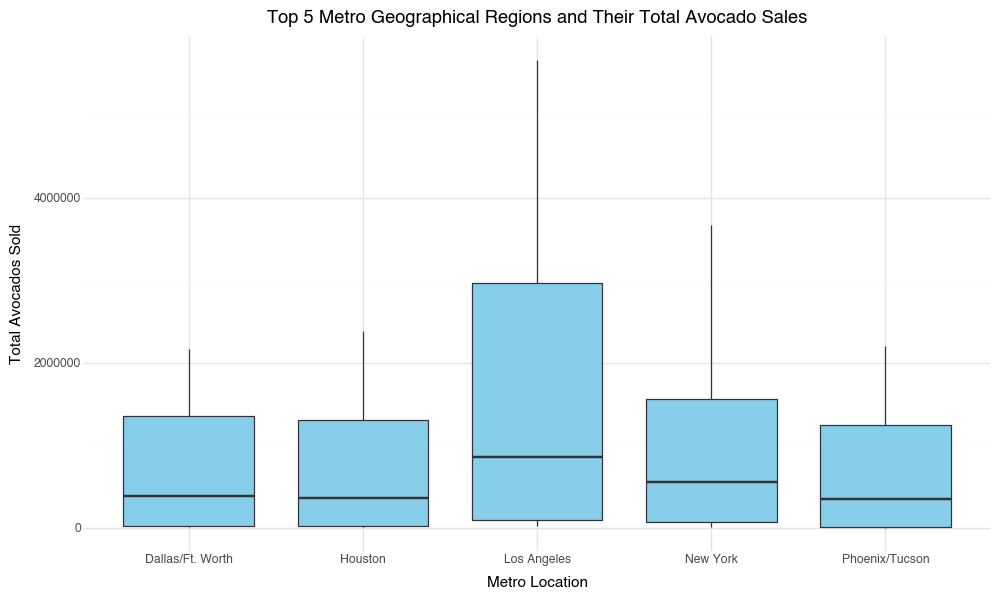

In [218]:
# Displaying the plot

metroboxplot

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [219]:
# Creating a new dataset

california_metros = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']

california_data = avocadodata[
    (avocadodata['geography'].isin(california_metros)) &
    (avocadodata['geo_type'] == 'metro')  
].copy()

In [220]:
# Checking to see if new dataset was created
california_data

,date,average_price,total_sold,small_avocado,large_avocado,extrasmall_avocado,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,metro,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,metro,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,metro,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,metro,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,metro,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,metro,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,metro,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,metro,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,metro,11,29


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.



In [221]:
# Computing the statistics 
grouped = california_data.groupby(['geography', 'type'])['average_price']

summary = grouped.agg(['mean', 'median', 'std', 'count']).reset_index()


In [222]:
# Showing the stats
summary

,geography,type,mean,median,std,count
0,Los Angeles,conventional,1.047124,1.020,0.231167,306
1,Los Angeles,organic,1.574902,1.585,0.311722,306
2,Sacramento,conventional,1.295359,1.260,0.219177,306
3,Sacramento,organic,1.873856,1.840,0.292875,306
4,San Diego,conventional,1.113856,1.090,0.242960,306
5,San Diego,organic,1.798366,1.800,0.331655,306
6,San Francisco,conventional,1.400490,1.390,0.272060,306
7,San Francisco,organic,2.119444,2.060,0.395854,306


In [223]:
# Finding the mean differences

pivotdiff = summary.pivot(index='geography', columns='type', values='mean').reset_index()
pivotdiff['price_diff'] = pivotdiff['organic'] - pivotdiff['conventional']

In [224]:
# Displaying mean differences

pivotdiff

type,geography,conventional,organic,price_diff
0,Los Angeles,1.047124,1.574902,0.527778
1,Sacramento,1.295359,1.873856,0.578497
2,San Diego,1.113856,1.798366,0.684510
3,San Francisco,1.400490,2.119444,0.718954


In [225]:
#Displaying mean price differences in order

pivotdiff.sort_values(by='price_diff', ascending=False)

type,geography,conventional,organic,price_diff
3,San Francisco,1.400490,2.119444,0.718954
2,San Diego,1.113856,1.798366,0.684510
1,Sacramento,1.295359,1.873856,0.578497
0,Los Angeles,1.047124,1.574902,0.527778


The price difference in means for conventional and organic avocados is most different in San Fransisco, due to this city having the largest price at 0.718954. San Diego follows with a price difference of mean at 0.684510.

In [226]:
# Finding the median differences

pivotmed = summary.pivot(index='geography', columns='type', values='median').reset_index()
pivotmed['price_diff'] = pivotmed['organic'] - pivotmed['conventional']



In [227]:
# Displaying pivotmed

pivotmed

type,geography,conventional,organic,price_diff
0,Los Angeles,1.02,1.585,0.565
1,Sacramento,1.26,1.840,0.580
2,San Diego,1.09,1.800,0.710
3,San Francisco,1.39,2.060,0.670


In [228]:
# Displaying the pivotmed in order

pivotmed.sort_values(by='price_diff', ascending=False)

type,geography,conventional,organic,price_diff
2,San Diego,1.09,1.800,0.710
3,San Francisco,1.39,2.060,0.670
1,Sacramento,1.26,1.840,0.580
0,Los Angeles,1.02,1.585,0.565


Now, it shows that the price difference for the medians of conventional and organic avocados are most different in San Diego at a difference of 0.710. San Francisco follows at 0.670. 

In [229]:
# Comparing by range
range_stats = (
    california_data
    .groupby(['geography', 'type'])['average_price']
    .agg(min_price='min', max_price='max')
    .reset_index()
)

In [230]:
# Computing the range
range_stats['price_range'] = range_stats['max_price'] - range_stats['min_price']


In [231]:
# Displaying the range

range_stats

,geography,type,min_price,max_price,price_range
0,Los Angeles,conventional,0.53,1.80,1.27
1,Los Angeles,organic,0.96,2.44,1.48
2,Sacramento,conventional,0.86,1.89,1.03
3,Sacramento,organic,1.13,2.82,1.69
4,San Diego,conventional,0.61,1.83,1.22
5,San Diego,organic,1.05,2.78,1.73
6,San Francisco,conventional,0.84,2.20,1.36
7,San Francisco,organic,1.06,3.25,2.19


The range is greatest in San Fransisco for both minimum and maximum prices for conventional and organic avocados. Because the differences in means may be skewed by outliers, we can use the median data instead to get a good idea of the middle value for each category. Based on the median information, avocados are most different in San Diego at a difference of 0.710. 

In [232]:
# Creating a plot with medians

from plotnine import ggplot, aes, geom_col, labs, theme, element_text

p_diff = (
    ggplot(pivotmed, aes(x='geography', y='price_diff'))
    + geom_col(fill='skyblue')   
    + labs(
        title = "Median Price Gap: Organic vs Conventional",
        x = "Metro Region",
        y = "Median Price Difference ($)"
    )
    + theme(
        axis_text_x = element_text(),
        plot_title = element_text(face='bold'),
        figure_size = (8, 6)
    )
)


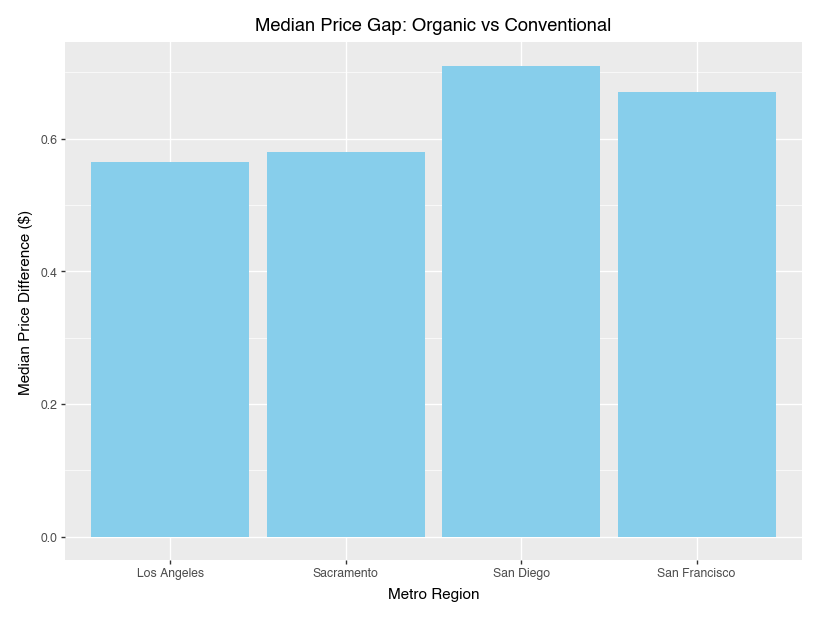

In [233]:
# Displaying the difference in medians graph

p_diff

In [280]:
# Creating the final graph
from plotnine import ggplot, aes, geom_col, facet_grid, labs, theme, element_text, scale_fill_manual
from plotnine.positions import position_fill

# Renaming the size columns
california_data = california_data.rename(columns={
    'small_avocado': 'Small',
    'large_avocado': 'Large',
    'extrasmall_avocado': 'Extra Small'  
})

# Setting orders for consistency
region_order = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']
size_order   = ['Extra Small', 'Large', 'Small']
type_order   = ['conventional', 'organic']

# Averaging the size volumes by region and type
avg = (
    california_data
    .groupby(['geography', 'type'], as_index=False)[['Extra Small', 'Small', 'Large']]
    .mean()
)

# Melting into long form
long = avg.melt(
    id_vars=['geography', 'type'],
    value_vars=size_order,
    var_name='size',
    value_name='avg_sales'
)

# Setting categorical order
long['geography'] = pd.Categorical(long['geography'], region_order, ordered=True)
long['type'] = pd.Categorical(long['type'], type_order, ordered=True)
long['size'] = pd.Categorical(long['size'], size_order, ordered=True)


In [281]:
# Plotting 
recreation = (
    ggplot(long, aes('geography', 'avg_sales', fill='size'))
    + geom_col(position=position_fill())  # stacked bars scaled to proportion
    + facet_grid('~type')                 # one column per type
    + labs(
        title='Proportion of Average Hass Avocado Sales by Size',
        x='Region of California',
        y='Proportion',
        fill='Size'
    )
    + scale_fill_manual(
        values={
            'Extra Small': '#9467BD',  # purple
            'Small': '#D55E00',        # teal
            'Large': '#3CB371'         # orange 
        }
    )

    + theme(
        axis_text_x=element_text(rotation=35, ha='right'),
        figure_size=(10, 8),
        subplots_adjust={'wspace': 0.15}
    )
)


/opt/anaconda3/lib/python3.13/site-packages/plotnine/themes/themeable.py:2486: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


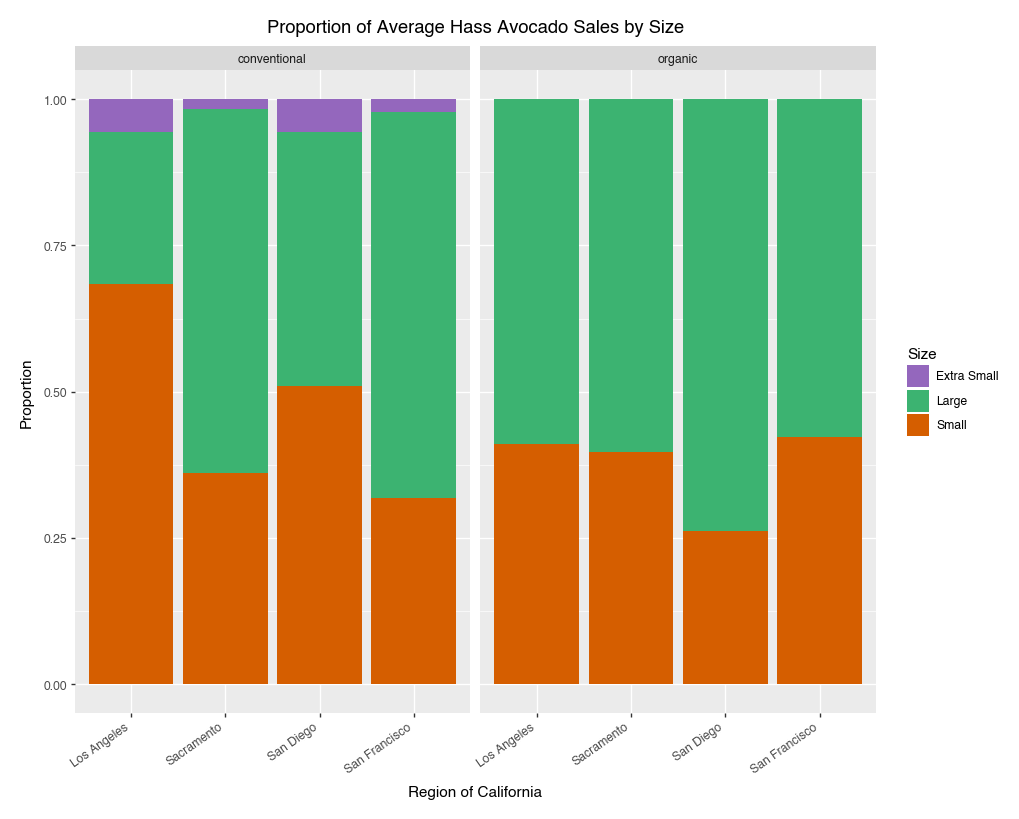

In [282]:
# Showing the graph

recreation

USING OUTSIDE DATA SECTION

In [ ]:
# creating dataframe with median avocado prices in california cities

grouped = california_data.groupby(['geography'])['average_price']

summaryprice = grouped.agg(['median']).reset_index()

In [255]:
summaryprice = summaryprice.rename(columns={'median': 'avocado price'})


In [256]:
summaryprice

,geography,avocado price
0,Los Angeles,1.230
1,Sacramento,1.595
2,San Diego,1.410
3,San Francisco,1.750


In [ ]:
# Creating dataframe with median avocado sales amount

grouped = california_data.groupby(['geography'])['total_sold']

summarysold = grouped.agg(['median']).reset_index()

In [253]:
summarysold = summarysold.rename(columns={'median': 'avocados sold'})

In [254]:
summarysold

,geography,avocados sold
0,Los Angeles,864590.440
1,Sacramento,146904.855
2,San Diego,157449.985
3,San Francisco,284491.125


In [252]:

# Creating the housing price dataframe
housing_data = pd.DataFrame({
    'geography': ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco'],
    'house price': [1040000, 522000, 950000, 1200000]
})

housing_data


,geography,house price
0,Los Angeles,1040000
1,Sacramento,522000
2,San Diego,950000
3,San Francisco,1200000


In [ ]:
# Merging on the shared "geography" column
combined = pd.merge(summarysold, housing_data, on='geography', how='left')

combined


,geography,avocados sold,house price
0,Los Angeles,864590.440,1040000
1,Sacramento,146904.855,522000
2,San Diego,157449.985,950000
3,San Francisco,284491.125,1200000


In [ ]:
# Merge the avocado price data into existing combined dataframe
combined = pd.merge(combined, summaryprice, on='geography', how='left')

combined


,geography,avocados sold,house price,avocado price
0,Los Angeles,864590.440,1040000,1.230
1,Sacramento,146904.855,522000,1.595
2,San Diego,157449.985,950000,1.410
3,San Francisco,284491.125,1200000,1.750


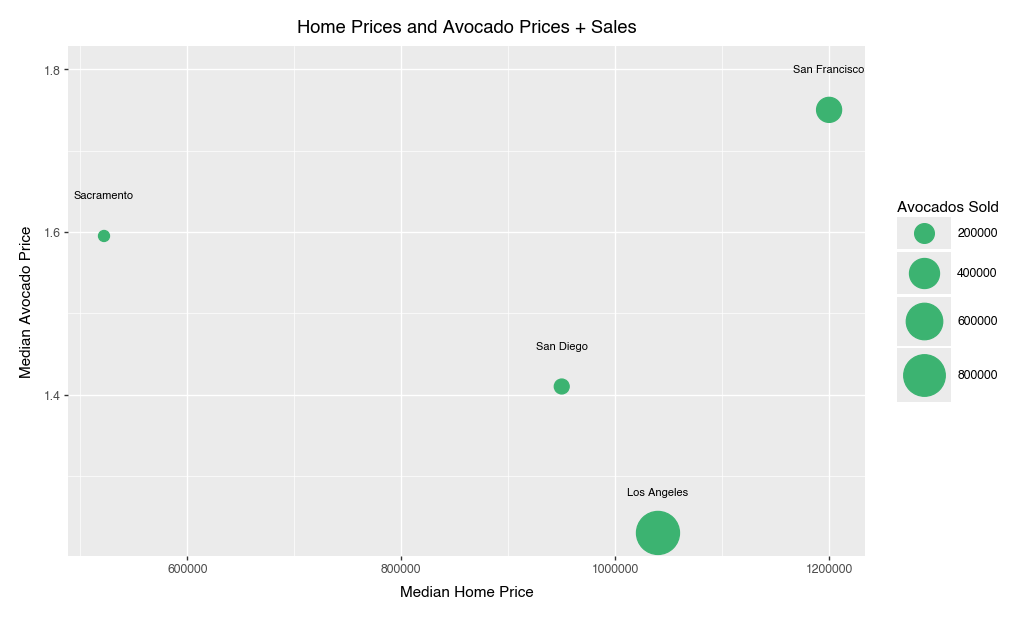

In [ ]:
# Creating bubble graph

from plotnine import (
    ggplot, aes, geom_point, geom_text,
    scale_size_continuous, labs, theme, element_text
)

plot = (
    ggplot(combined, aes(
        x='house price',
        y='avocado price',
        size='avocados sold',
        label='geography'
    ))
    + geom_point(color='#3CB371')  
    + geom_text(nudge_y=0.05, size=8, show_legend=False)
    + scale_size_continuous(range=[4, 17])     
    + labs(
        title='Home Prices and Avocado Prices + Sales',
        x='Median Home Price',
        y='Median Avocado Price',
        size='Avocados Sold'
    )
    + theme(
        figure_size=(10,6),
        axis_text_x=element_text()
    )
)

plot


The sales of avocados are typically higher when house price is higher. We see that the median avocado sales are highest in Los Angeles and San Fransisco (because of their larger bubble sizes on the graph). Los Angeles and San Francisco are also the metro regions with the highest median house prices. Sacramento, the area with the lowest median house price has the smallest bubble on the graph, showing the lowest of median avocado sales. We see that the most avocados were sold in Los Angeles where avocado median prices were actually the lowest. Therefore, the most avaocados are typically sold when avocado price is lower and house prices are higher. 